In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go 
import plotly.figure_factory as ff 
import plotly.subplots as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df = df.drop('id', axis=1)

In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
unique_values = df.apply(lambda x: x.unique()) # Checking the unique values for each column
print(unique_values)

gender                                           [Male, Female, Other]
age                  [67.0, 61.0, 80.0, 49.0, 79.0, 81.0, 74.0, 69....
hypertension                                                    [0, 1]
heart_disease                                                   [1, 0]
ever_married                                                 [Yes, No]
work_type            [Private, Self-employed, Govt_job, children, N...
Residence_type                                          [Urban, Rural]
avg_glucose_level    [228.69, 202.21, 105.92, 171.23, 174.12, 186.2...
bmi                  [36.6, nan, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8...
smoking_status        [formerly smoked, never smoked, smokes, Unknown]
stroke                                                          [1, 0]
dtype: object


In [6]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
df.isnull().sum().sum()  #checking the total number of null values

201

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Visualization of Missing Values

In [9]:
# Create a DataFrame with the missing value information
missing_data = df.isnull()

# Create a heatmap using Plotly
fig = px.imshow(missing_data.T, color_continuous_scale='viridis', labels={'color': 'Missing Value'})

# Customize the layout
fig.update_layout(
    title='Missing Value Heatmap (Each Row)',
    xaxis_title='Data Points (Rows)',
    yaxis_title='Columns',
)

# Show the heatmap
fig.show()

Checking Correlation

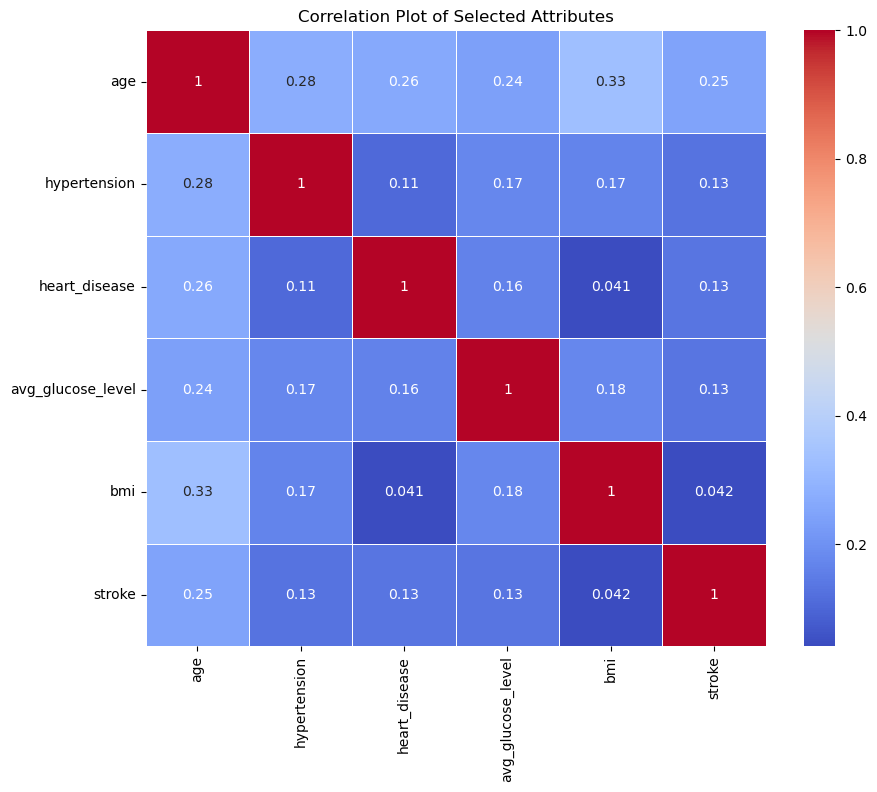

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the attributes for the correlation plot
attributes = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

# Create a subset DataFrame with the selected attributes
correlation_df = df[attributes]

# Compute the correlation matrix
correlation_matrix = correlation_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot of Selected Attributes')
plt.show()


Checking outliers


In [11]:
column_variables = ['age']
# Reshape the DataFrame to long format
df_long = pd.melt(df[column_variables], value_vars=column_variables, var_name='Feature', value_name='Value')

# Create the box plot
fig = px.box(df_long, x='Feature', y='Value')

# Apply the 'plotly_white' template for a clean background
fig.update_layout(template='plotly_white')

# Show the plot
fig.show()


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib

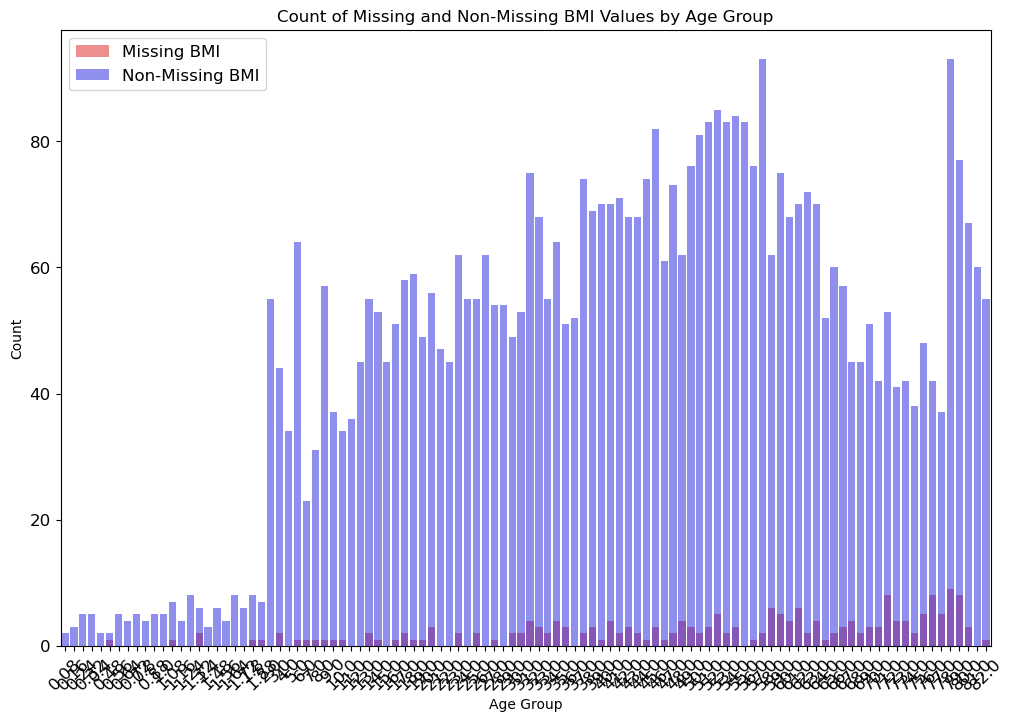

In [12]:
# Create a mask to identify missing 'bmi' values
missing_bmi_mask = df['bmi'].isnull()

# Compute counts of missing and non-missing 'bmi' values by age group
age_groups = df['age'].unique()
missing_counts = []
non_missing_counts = []

for age_group in age_groups:
    missing_counts.append(sum(missing_bmi_mask[df['age'] == age_group]))
    non_missing_counts.append(sum(~missing_bmi_mask[df['age'] == age_group]))

# Create a larger figure
plt.figure(figsize=(12, 8))

# Create a bar chart to visualize missing and non-missing 'bmi' values by age group
ax = sns.barplot(x=age_groups, y=missing_counts, color='red', alpha=0.5, label='Missing BMI')
sns.barplot(x=age_groups, y=non_missing_counts, color='blue', alpha=0.5, label='Non-Missing BMI')

# Customize the tick labels
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Missing and Non-Missing BMI Values by Age Group')
plt.xticks(rotation=45, fontsize=12)  # Adjust font size and rotation
plt.yticks(fontsize=12)  # Adjust font size

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

In [13]:
# Check for missing values in the 'bmi' column
if df['bmi'].isnull().sum() > 0:
    # Separate the dataset into two parts: one with missing 'bmi' values and one without
    df_missing = df[df['bmi'].isnull()]
    df_not_missing = df[~df['bmi'].isnull()]

Linear Regression model to fill missing BMI

In [14]:
# Create and fit a linear regression model using 'age' as the predictor
model = LinearRegression()
model.fit(df_not_missing[['age']], df_not_missing['bmi'])

# Predict missing 'bmi' values using 'age'
predicted_bmi = model.predict(df_missing[['age']])

# Create a new DataFrame with the same data
df_new = df.copy()

# Fill in the missing values with the predicted values in the new DataFrame
df_new.loc[df['bmi'].isnull(), 'bmi'] = predicted_bmi

Checking the difference

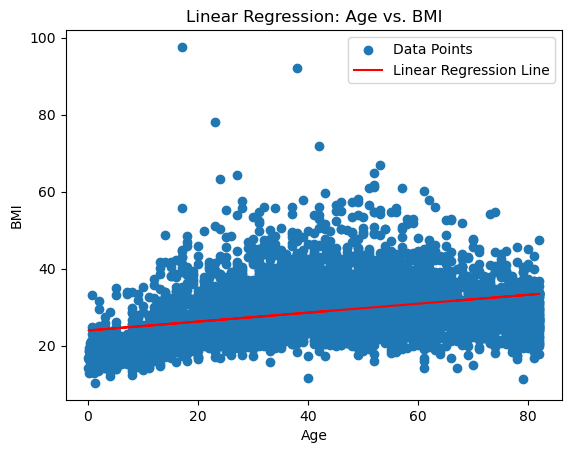

In [15]:
import matplotlib.pyplot as plt

# Create and fit a linear regression model using 'age' as the predictor
model = LinearRegression()
model.fit(df_not_missing[['age']], df_not_missing['bmi'])

# Predict missing 'bmi' values using 'age'
predicted_bmi = model.predict(df_missing[['age']])

# Create a new DataFrame with the same data
df_new = df.copy()

# Fill in the missing values with the predicted values in the new DataFrame
df_new.loc[df['bmi'].isnull(), 'bmi'] = predicted_bmi

# Plot the original data points
plt.scatter(df_not_missing['age'], df_not_missing['bmi'], label='Data Points')

# Plot the linear regression line
plt.plot(df_not_missing['age'], model.predict(df_not_missing[['age']]), color='red', label='Linear Regression Line')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Linear Regression: Age vs. BMI')

# Show a legend
plt.legend()

# Show the plot
plt.show()


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



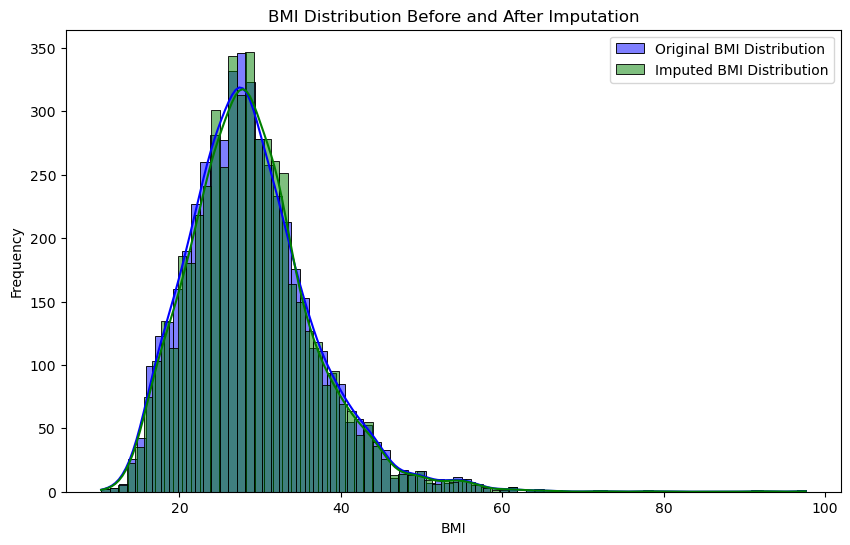

In [16]:
# Create a histogram to visualize the difference
plt.figure(figsize=(10, 6))

# Original distribution in blue
sns.histplot(df['bmi'], kde=True, color='blue', label='Original BMI Distribution')

# Imputed distribution in green
sns.histplot(df_new['bmi'], kde=True, color='green', label='Imputed BMI Distribution')

plt.title('BMI Distribution Before and After Imputation')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib

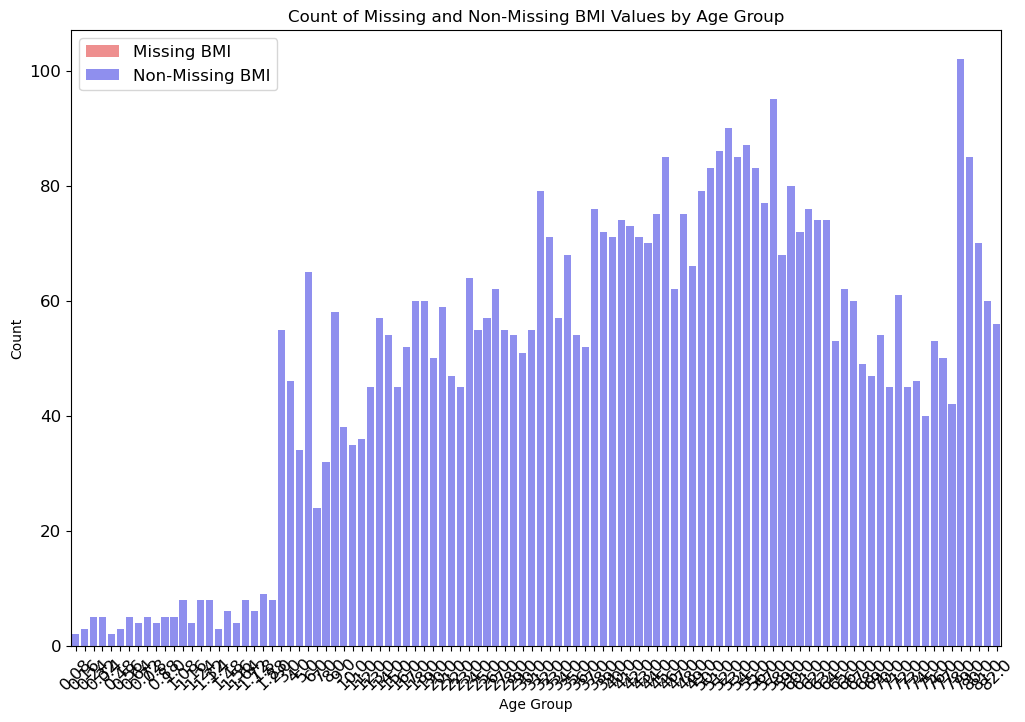

In [17]:
# Create a mask to identify missing 'bmi' values
missing_bmi_mask = df_new['bmi'].isnull()

# Compute counts of missing and non-missing 'bmi' values by age group
age_groups = df_new['age'].unique()
missing_counts = []
non_missing_counts = []

for age_group in age_groups:
    missing_counts.append(sum(missing_bmi_mask[df_new['age'] == age_group]))
    non_missing_counts.append(sum(~missing_bmi_mask[df_new['age'] == age_group]))

# Create a larger figure
plt.figure(figsize=(12, 8))

# Create a bar chart to visualize missing and non-missing 'bmi' values by age group
ax = sns.barplot(x=age_groups, y=missing_counts, color='red', alpha=0.5, label='Missing BMI')
sns.barplot(x=age_groups, y=non_missing_counts, color='blue', alpha=0.5, label='Non-Missing BMI')

# Customize the tick labels
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Missing and Non-Missing BMI Values by Age Group')
plt.xticks(rotation=45, fontsize=12)  # Adjust font size and rotation
plt.yticks(fontsize=12)  # Adjust font size

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

In [18]:
df_new.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Encoding categorical variables

In [ ]:
df['gender'].unique()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,30.998572,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,Yes,Private,Urban,83.75,33.204372,never smoked,0
5106,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,1,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Gender one label encoding

In [51]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'gender' column in the 'df_new' DataFrame
df_new['gender'] = label_encoder.fit_transform(df_new['gender'])

# Create a new DataFrame 'df_new_encoded' with the same data as 'df_new'
df_new_encoded = df_new.copy()

# Display the updated DataFrame
df_new_encoded.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,30.998572,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Everr Married binary encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'ever_married' column in the df_new_encoded DataFrame
df_new_encoded['ever_married'] = label_encoder.fit_transform(df_new_encoded['ever_married'])

# Display the updated DataFrame
df_new_encoded.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,Rural,202.21,30.998572,never smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1


Work Type one hot encoding

In [53]:
# Perform one-hot encoding for the 'work_type' column
df_new_encoded = pd.get_dummies(df_new_encoded, columns=['work_type'], prefix='work_type')

# Display the updated DataFrame
df_new_encoded.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,Urban,228.69,36.600000,formerly smoked,1,False,False,True,False,False
1,0,61.0,0,0,1,Rural,202.21,30.998572,never smoked,1,False,False,False,True,False
2,1,80.0,0,1,1,Rural,105.92,32.500000,never smoked,1,False,False,True,False,False
3,0,49.0,0,0,1,Urban,171.23,34.400000,smokes,1,False,False,True,False,False
4,0,79.0,1,0,1,Rural,174.12,24.000000,never smoked,1,False,False,False,True,False


Residence type binary encoding

In [54]:
# Perform binary encoding for the 'Residence_type' column
df_new_encoded['Residence_type'] = df_new_encoded['Residence_type'].map({'Urban': 1, 'Rural': 0})

# Display the updated DataFrame
df_new_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,formerly smoked,1,False,False,True,False,False
1,0,61.0,0,0,1,0,202.21,30.998572,never smoked,1,False,False,False,True,False
2,1,80.0,0,1,1,0,105.92,32.500000,never smoked,1,False,False,True,False,False
3,0,49.0,0,0,1,1,171.23,34.400000,smokes,1,False,False,True,False,False
4,0,79.0,1,0,1,0,174.12,24.000000,never smoked,1,False,False,False,True,False


Smoking status one hot encoding

In [55]:
# Perform one-hot encoding for the 'smoking_status' column
df_new_encoded = pd.get_dummies(df_new_encoded, columns=['smoking_status'], prefix='smoking')

# Display the updated DataFrame
df_new_encoded.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,False,False,True,False,False,False,True,False,False
1,0,61.0,0,0,1,0,202.21,30.998572,1,False,False,False,True,False,False,False,True,False
2,1,80.0,0,1,1,0,105.92,32.500000,1,False,False,True,False,False,False,False,True,False
3,0,49.0,0,0,1,1,171.23,34.400000,1,False,False,True,False,False,False,False,False,True
4,0,79.0,1,0,1,0,174.12,24.000000,1,False,False,False,True,False,False,False,True,False


Normalizing numerical data (using standardization (Z-score scaling) )

In [56]:
from sklearn.preprocessing import StandardScaler

# List of numeric column names
numeric_columns = ['age', 'avg_glucose_level', 'bmi']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply Z-score scaling to the numeric columns
df_new_encoded[numeric_columns] = scaler.fit_transform(df_new_encoded[numeric_columns])
df_new_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,1,1.051434,0,1,1,1,2.706375,0.993235,1,False,False,True,False,False,False,True,False,False
1,0,0.786070,0,0,1,0,2.121559,0.267382,1,False,False,False,True,False,False,False,True,False
2,1,1.626390,0,1,1,0,-0.005028,0.461942,1,False,False,True,False,False,False,False,True,False
3,0,0.255342,0,0,1,1,1.437358,0.708151,1,False,False,True,False,False,False,False,False,True
4,0,1.582163,1,0,1,0,1.501184,-0.639517,1,False,False,False,True,False,False,False,True,False


Profiling/Quick EDA

In [57]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html('report.html')


                                             |          | [  0%]   00:00 -> (? left)

d:\Anaconda\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Exploratory Data Analysis

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



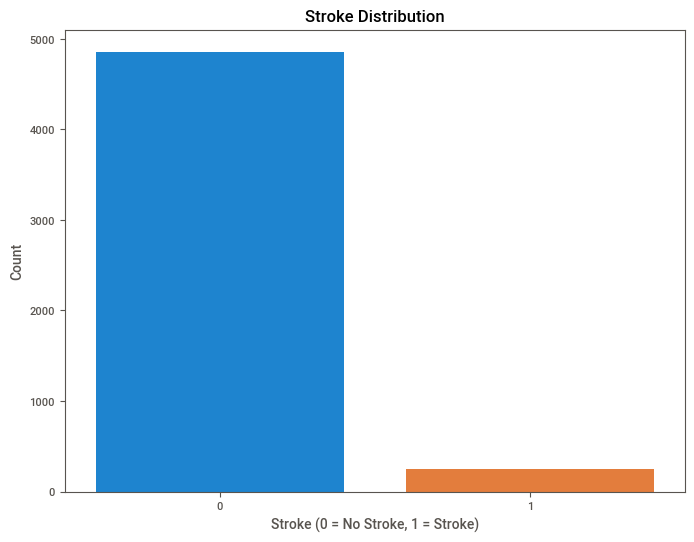

In [58]:
# Create a countplot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df_new, x='stroke')

# Set plot labels
plt.title('Stroke Distribution')
plt.xlabel('Stroke (0 = No Stroke, 1 = Stroke)')
plt.ylabel('Count')

# Show the plot
plt.show()


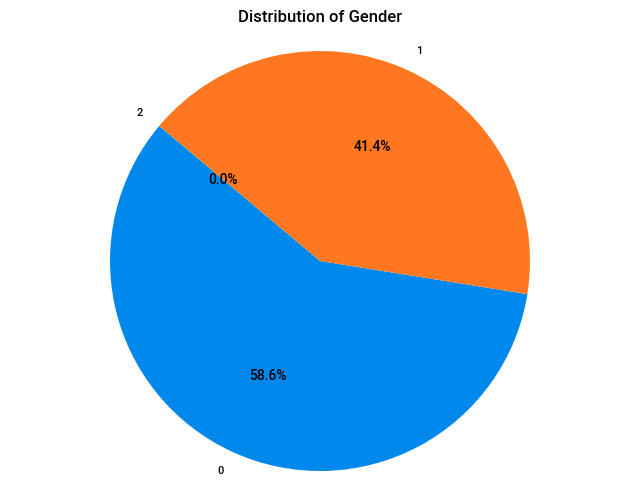

In [59]:
# Count the occurrences of each gender
gender_counts = df_new['gender'].value_counts()

# Create a pie plot
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib

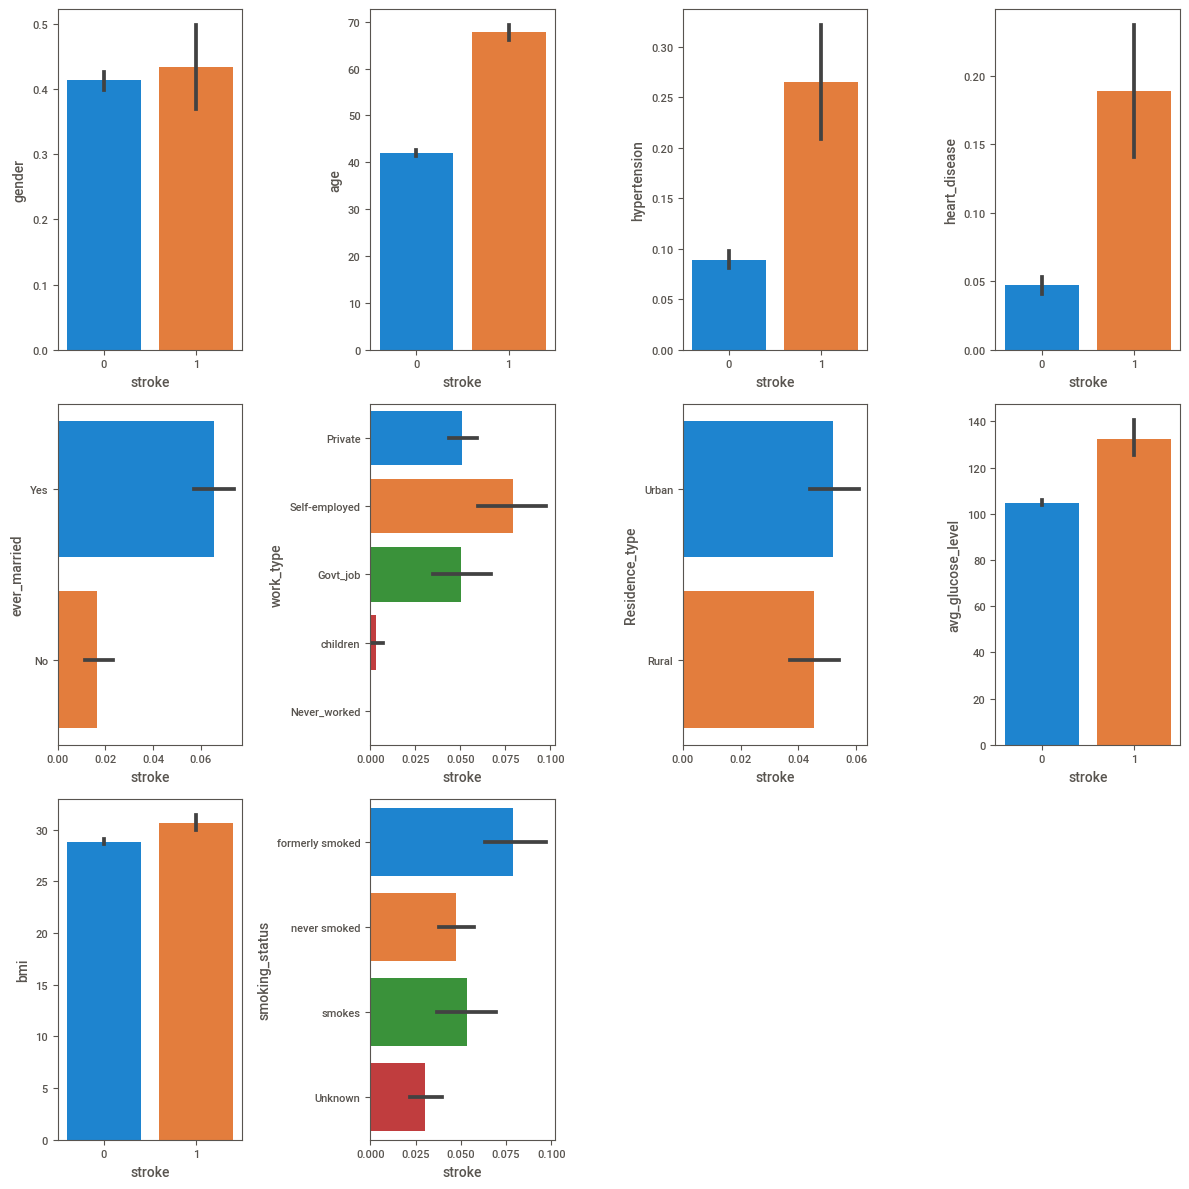

In [60]:
# Get the list of all column names except 'stroke'
column_variables = df_new.columns[df_new.columns != 'stroke']

# Calculate the number of rows and columns for subplots
num_rows = (len(column_variables) - 1) // 4 + 1
num_cols = min(len(column_variables), 4)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Iterate over the column variables
for i, col in enumerate(column_variables):
    # Create a bar plot for each column variable
    sns.barplot(x='stroke', y=col, data=df_new, ax=axes[i])
    axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(len(column_variables), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



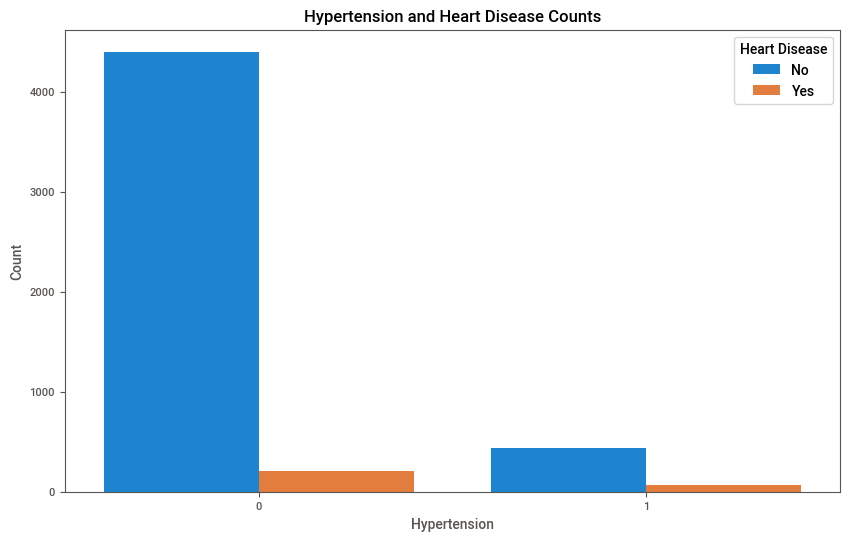

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_new, x='hypertension', hue='heart_disease')
plt.title('Hypertension and Heart Disease Counts')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib

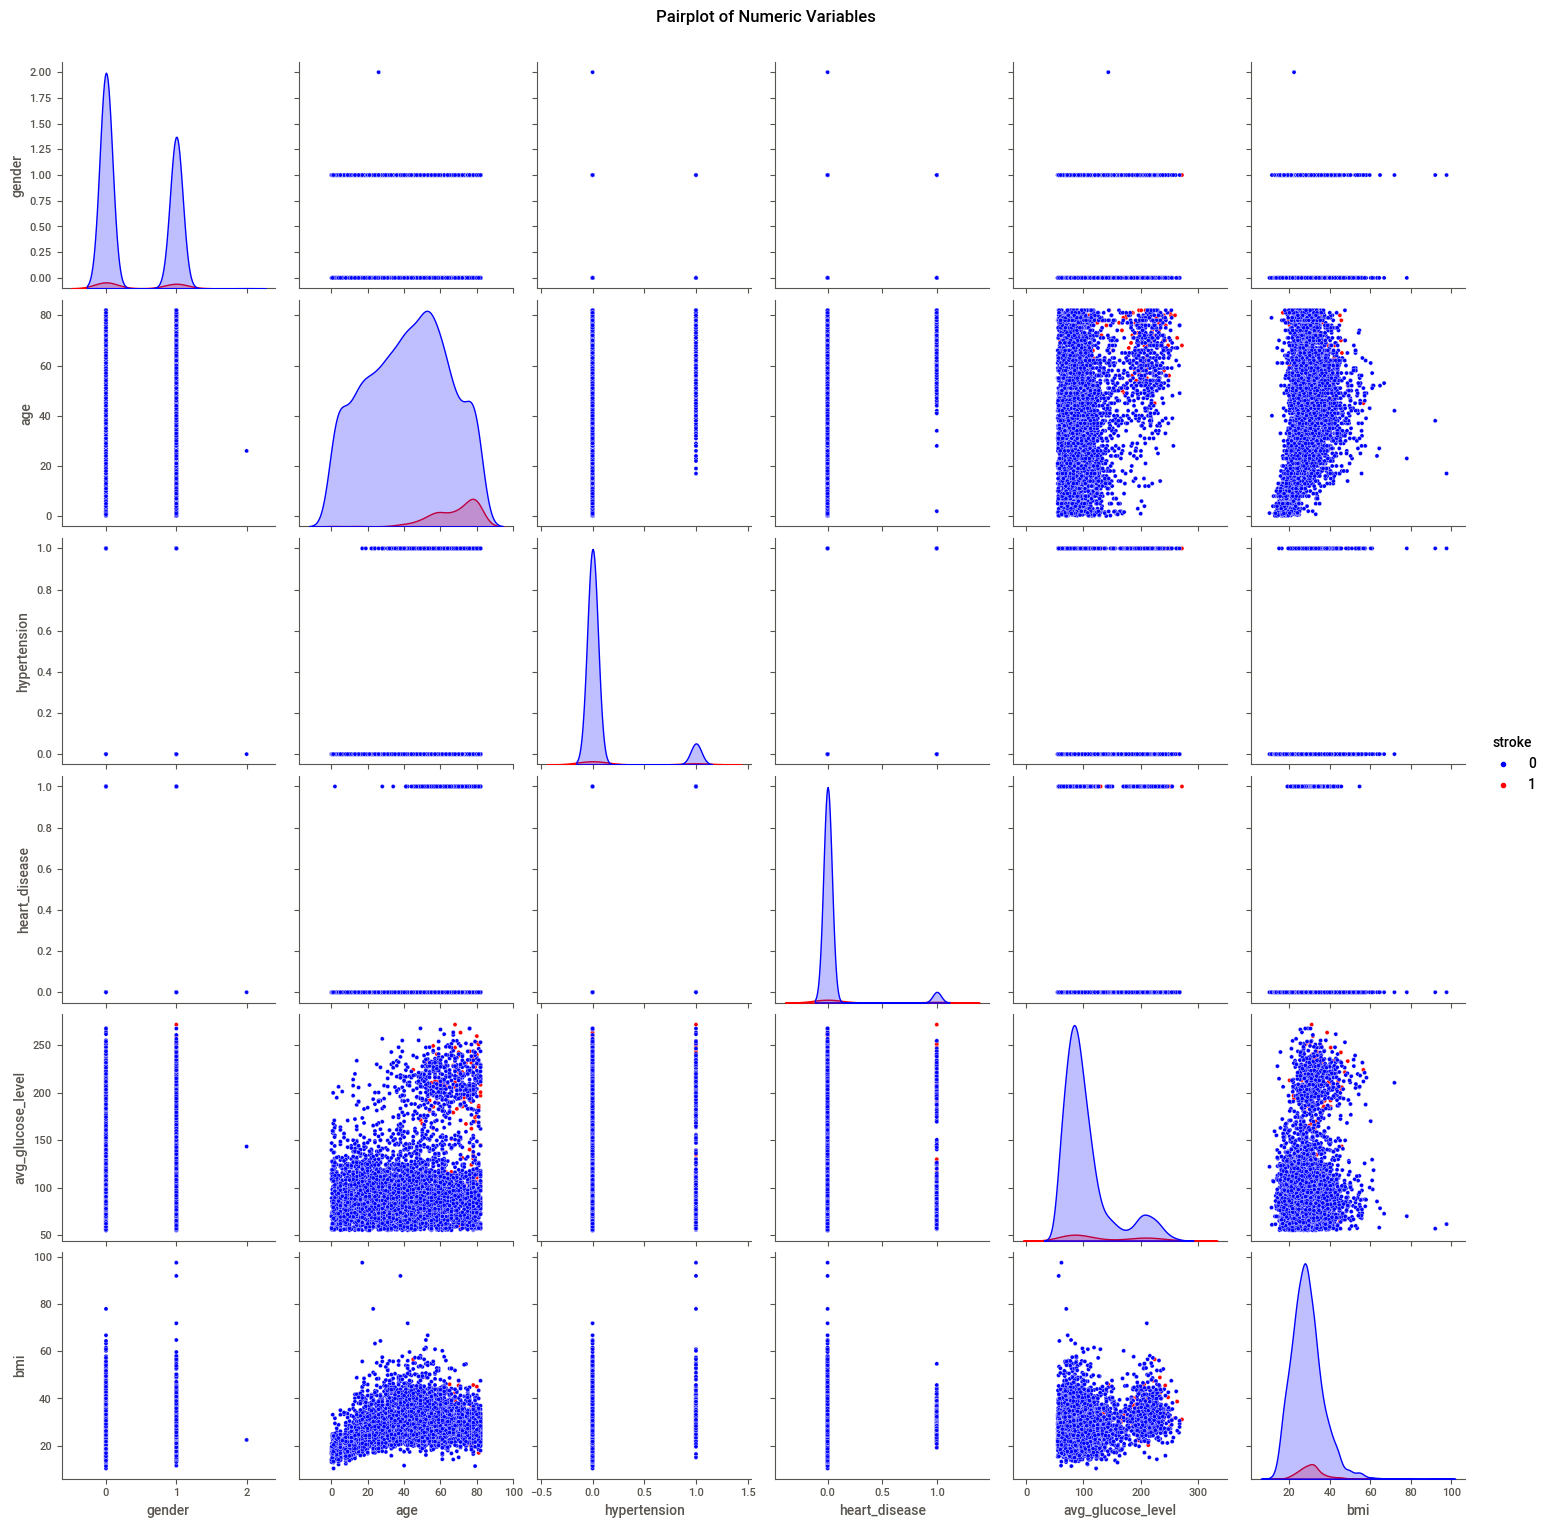

In [62]:
sns.pairplot(data=df_new, hue='stroke', diag_kind='kde', palette={0: 'blue', 1: 'red'})
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


In [63]:
# Create an animated scatter plot
fig = px.scatter(df_new, x='age', y='bmi',
                 color='avg_glucose_level', size='avg_glucose_level',
                 title='Animated Scatter Plot of Age vs. Average Glucose Level')

# Customize the appearance of the plot (optional)
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers+text'), layer='above')  # Set layer='above'
fig.update_xaxes(title_text='Age')
fig.update_yaxes(title_text='BMI')
fig.update_layout(legend_title_text='Stroke', showlegend=True)

# Show the animated plot
fig.show()


In [64]:
# Create a Sunburst chart
fig = px.sunburst(
    df_new,
    path=['gender', 'ever_married', 'work_type','Residence_type', 'smoking_status' ],
    values='bmi',  # Numeric values to visualize
    color='stroke',  # Color the Sunburst segments based on 'bmi' values
)

# Update the layout and title
fig.update_layout(title='Sunburst Chart Example')
fig.update_traces(textinfo='label+percent entry')

# Show the Sunburst chart
fig.show()


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



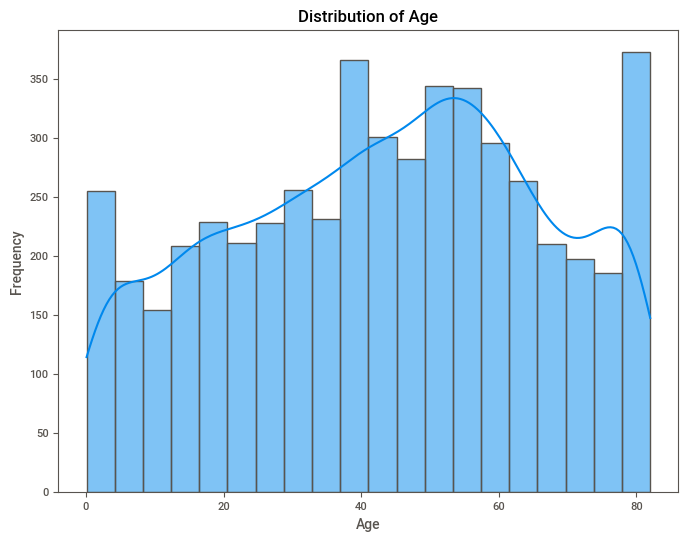

In [65]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_new, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Outlier Detection

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib

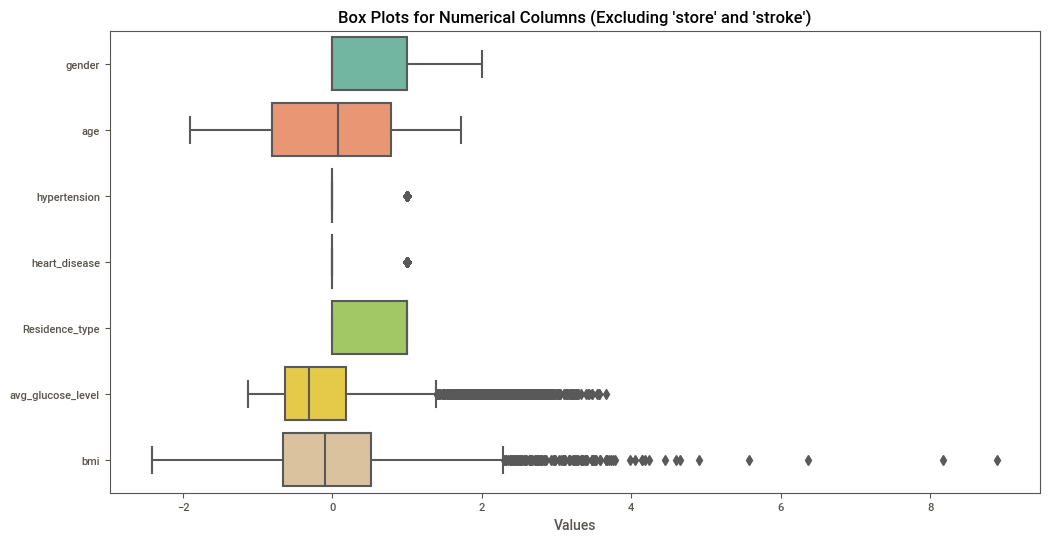

In [66]:
# Create box plots for numerical columns excluding 'store' and 'stroke' columns
numerical_columns = df_new_encoded.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col not in ['store', 'stroke']]  # Exclude 'store' and 'stroke'

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_new_encoded[numerical_columns], orient="h", palette="Set2")
plt.title("Box Plots for Numerical Columns (Excluding 'store' and 'stroke')")
plt.xlabel("Values")
plt.show()


In [67]:
from scipy import stats

# Define a Z-score threshold for outlier removal 
z_threshold = 3

# Calculate the Z-scores for numerical columns (excluding 'store' and 'stroke')
z_scores = stats.zscore(df_new_encoded[numerical_columns])

# Find rows where any Z-score exceeds the threshold
outlier_indices = (z_scores > z_threshold).any(axis=1)

# Remove rows with outliers
df_no_outliers = df_new_encoded[~outlier_indices]

# Check the shape of the resulting DataFrame
print("Shape after removing outliers:", df_no_outliers.shape)


Shape after removing outliers: (4325, 18)


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Anaconda\Lib

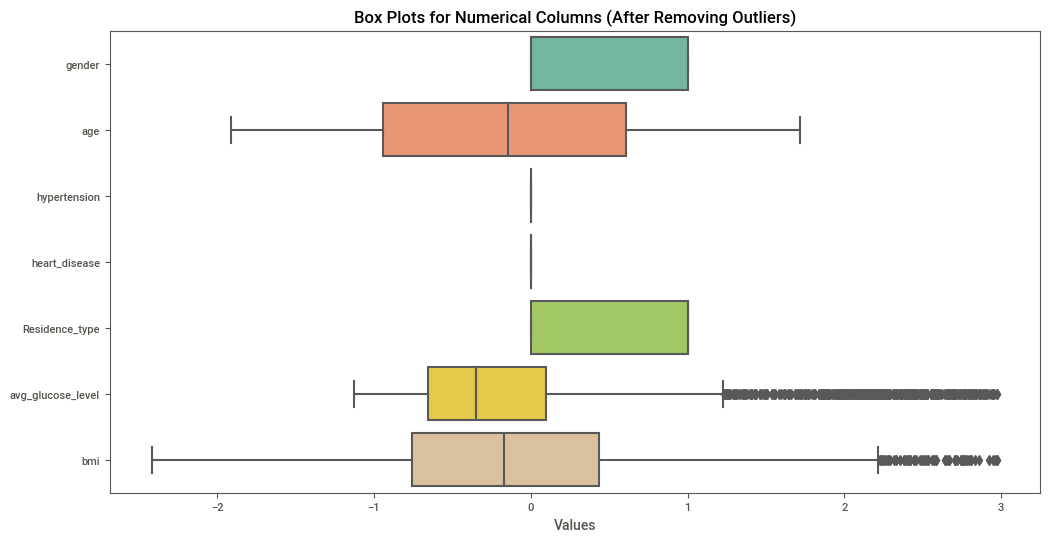

In [68]:

# Create box plots for numerical columns after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[numerical_columns], orient="h", palette="Set2")
plt.title("Box Plots for Numerical Columns (After Removing Outliers)")
plt.xlabel("Values")
plt.show()


Balancing The Data

In [69]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Define the resampling strategies and sampling ratios
over = SMOTE(sampling_strategy=1)
under = RandomUnderSampler(sampling_strategy=0.1)

# Split the data into features (X) and target variable (y)
X = df_no_outliers.drop('stroke', axis=1)  # Features
y = df_no_outliers['stroke']  # Target variable

# Create the resampling pipeline
resampling_pipeline = Pipeline([
    ('under', under),
    ('over', over)
])

# Apply resampling to the data
X_resampled, y_resampled = resampling_pipeline.fit_resample(X, y)

# Check the class distribution after resampling
from collections import Counter
print(Counter(y_resampled))


Counter({0: 1460, 1: 1460})


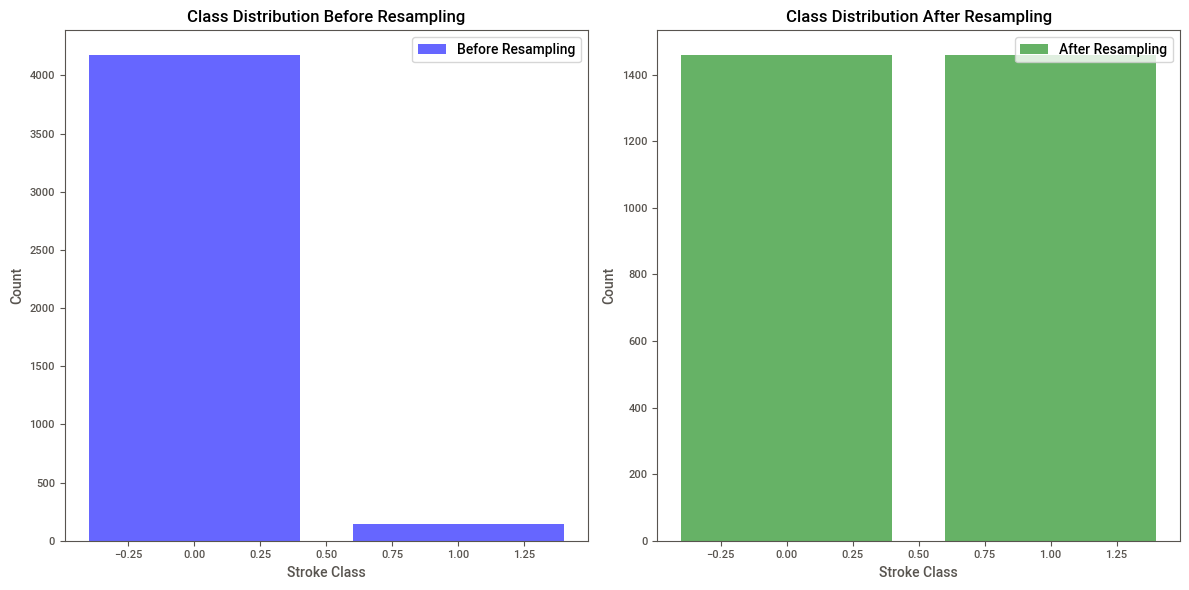

In [70]:
from collections import Counter

# Original class distribution
class_distribution_before = Counter(y)

# Resampled class distribution
class_distribution_after = Counter(y_resampled)

# Extract the class labels and their respective counts
labels_before, counts_before = zip(*class_distribution_before.items())
labels_after, counts_after = zip(*class_distribution_after.items())

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the class distribution before resampling
axes[0].bar(labels_before, counts_before, color='blue', alpha=0.6, label='Before Resampling')
axes[0].set_xlabel('Stroke Class')
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution Before Resampling')
axes[0].legend()

# Plot the class distribution after resampling
axes[1].bar(labels_after, counts_after, color='green', alpha=0.6, label='After Resampling')
axes[1].set_xlabel('Stroke Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Class Distribution After Resampling')
axes[1].legend()

# Add labels to the right subplot
axes[1].set_xlabel('Stroke Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Class Distribution After Resampling')
axes[1].legend()

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


Spliting The Data set for Training and Testing

In [71]:
from sklearn.model_selection import train_test_split
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [72]:
from sklearn.metrics import accuracy_score, classification_report, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC  # Import Support Vector Classifier (SVM)

# Define a list of classifiers to explore
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC())  # Add Support Vector Machine (SVM)
]

# Iterate over each classifier and evaluate its performance
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_rep)
    print("=" * 50)


Classifier: Logistic Regression
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       291
           1       0.82      0.84      0.83       293

    accuracy                           0.83       584
   macro avg       0.83      0.83      0.83       584
weighted avg       0.83      0.83      0.83       584

Classifier: Decision Tree
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       291
           1       0.85      0.86      0.85       293

    accuracy                           0.85       584
   macro avg       0.85      0.85      0.85       584
weighted avg       0.85      0.85      0.85       584

Classifier: Random Forest
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       291
           1       0.90      0.97      

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc


Hyperparameters

In [74]:
# Define hyperparameter grids for each model
param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs', 'newton-cg']},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
}

# Iterate over each classifier and perform grid search
for name, classifier in classifiers:
    # Create a custom scorer for F1-score (you can use other metrics as well)
    f1_scorer = make_scorer(f1_score)
    
    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(classifier, param_grid[name], scoring=f1_scorer, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator with tuned hyperparameters
    best_classifier = grid_search.best_estimator_
    
    # Predict using the best classifier
    y_pred = best_classifier.predict(X_test)
    
    # Evaluate the performance
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_rep)
    print("=" * 50)


Classifier: Logistic Regression
Best Hyperparameters: {'C': 1, 'solver': 'liblinear'}
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       291
           1       0.82      0.86      0.84       293

    accuracy                           0.83       584
   macro avg       0.83      0.83      0.83       584
weighted avg       0.83      0.83      0.83       584

Classifier: Decision Tree
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2}
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       291
           1       0.86      0.86      0.86       293

    accuracy                           0.86       584
   macro avg       0.86      0.86      0.86       584
weighted avg       0.86      0.86      0.86       584



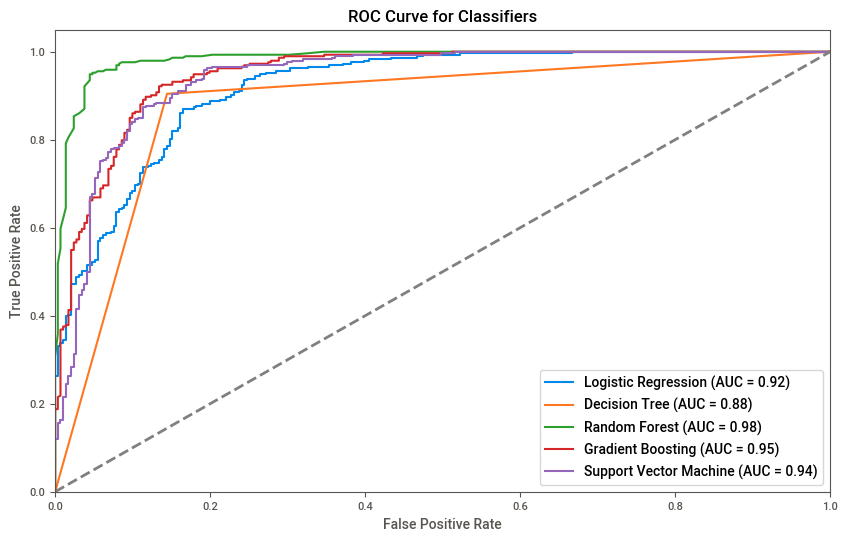

Logistic Regression: AUC = 0.92
Decision Tree: AUC = 0.88
Random Forest: AUC = 0.98
Gradient Boosting: AUC = 0.95
Support Vector Machine: AUC = 0.94


In [ ]:
# Define a list of classifiers to explore
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC(probability=True))  # Note: SVC needs `probability=True` for predict_proba
]

# Create a dictionary to store ROC AUC values
roc_auc_values = {}

# Iterate over each classifier and plot ROC curve
plt.figure(figsize=(10, 6))
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]  # Probability of class 1
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_auc_values[name] = roc_auc
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classifiers')
plt.legend(loc="lower right")
plt.show()

# Display ROC AUC values
for name, roc_auc in roc_auc_values.items():
    print(f"{name}: AUC = {roc_auc:.2f}")


In [ ]:
import joblib

# Save the best classifier to a file
joblib.dump(best_classifier, 'best_classifier.joblib')
best_classifier

SVC(C=10)

In [ ]:
best_classifier = joblib.load('best_classifier.joblib')
best_classifier

SVC(C=10)

In [ ]:
import pickle

# Save the best classifier to a file
with open('best_classifier.pkl', 'wb') as file:
    pickle.dump(best_classifier, file)


In [ ]:
import pickle

# Load the saved classifier
with open('best_classifier.pkl', 'rb') as file:
    best_classifier = pickle.load(file)


Shap

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


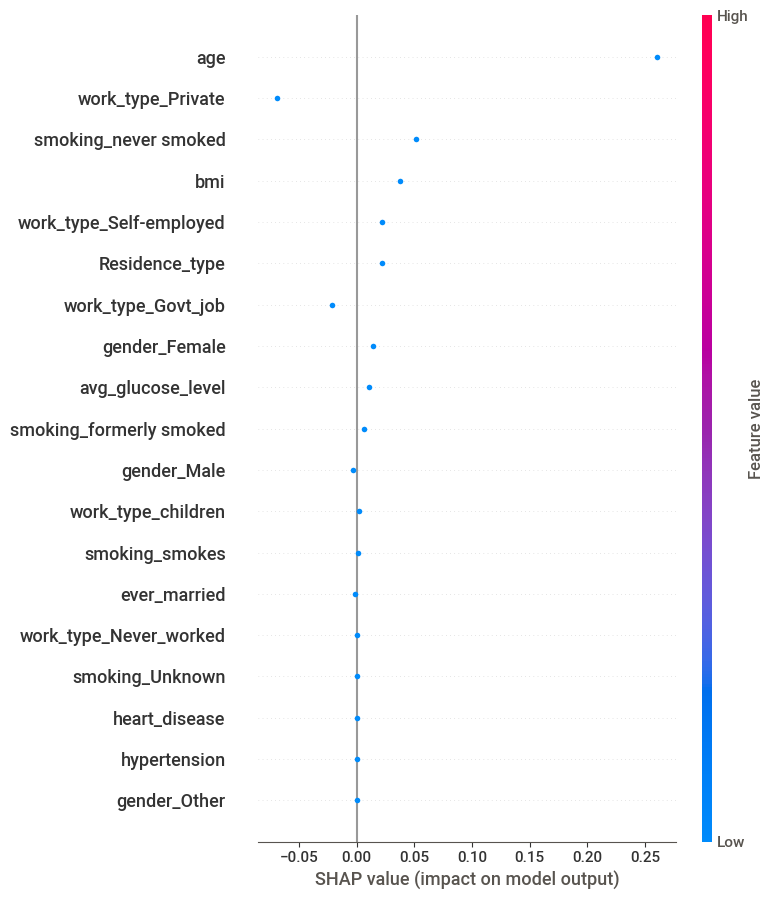

Expected Value (Model's Average Prediction): 0.4973073630136986


In [ ]:
import shap

# You can replace it with your classifier of choice
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(classifier)

# Explain the predictions for a single instance (you can change the index)
instance_to_explain = X_test.iloc[[0]]  # Wrap it in double square brackets to make it a DataFrame

# Calculate SHAP values for the instance
shap_values = explainer.shap_values(instance_to_explain)

# Visualize the SHAP values as a summary plot
shap.summary_plot(shap_values[1], instance_to_explain, feature_names=X.columns)  # Use shap_values[1] for class 1

# Display the expected value (the model's average prediction)
print(f"Expected Value (Model's Average Prediction): {explainer.expected_value[1]}")

# Explain the prediction for the instance (class 1, indicating stroke)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], instance_to_explain)
